# Machine Learning I, Programming Exercise 3

## 1. Gradient Descent
*Gradient Descent* is an iterative method to find a local minimum of a function $f: \mathbb{R}^{d} \to \mathbb{R}$. The algorithm starts with an arbitrary estimate $\mathbf{x}^{(0)} \in \mathbb{R}^{d}$ and produces a sequence of estimates $\mathbf{x}^{(1)}, \mathbf{x}^{(2)}, \ldots$ according to the following update rule:
\begin{equation*}
    \mathbf{x}^{(t+1)} = \mathbf{x}^{(t)} - \alpha_t \nabla f(\mathbf{x}^{(t)}),
\end{equation*}
where $\alpha_t \in \mathbb{R}_{+}$ is called the *step size* (note that it is allowed to change in every iteration). Since the gradient of $f$ points in the direction of steepest ascent, subtracting the gradient updates the estimate towards the direction of steepest descent. The algorithm terminates when $\lVert \nabla f(\mathbf{x}^{(t)}) \rVert < \varepsilon$ for some small $\varepsilon > 0$, i.e., when it (approximately) reaches a critical point of $f$. Note that convergence is not guaranteed in the general case, so it makes sense to enforce a hard limit on the number of iterations.

In this exercise we are going to perform gradient descent on Himmelblau's function, a polynomial of degree four in two variables:
\begin{align}
    f: && \mathbb{R}^{2} &\to \mathbb{R}\\
    &&\left(\begin{matrix}x \\ y\end{matrix}\right) &\mapsto (x^2 + y - 11)^2 + (x + y^2 - 7)^2
\end{align}
Specifically, your tasks are as follows:
1. Implement the gradient descent method on Himmelblau's function. Your routine should return the whole list of iterates $\mathbf{x}^{(0)}, \mathbf{x}^{(1)}, \ldots$, so that you can also visualize the trajectory. The code skeleton already plots Himmelblau's function, so you can use the [`plot`](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html#line-plots) method of Matplotlib's `Axes3D` object to draw the trajectory into the same figure. Choose $\mathbf{x}^{(0)}$ uniformly random from the square spanned by the two points $(\begin{matrix}-6 & -6\end{matrix})^T$ and $(\begin{matrix}6 & 6\end{matrix})^T$ and run the algorithm for several draws of $\mathbf{x}^{(0)}$.
2. Play around with the step size and visualize the result to see what happens.
3. Another popular method for finding local optima is called *Newton's Method*. It works exactly in the same way as gradient descent, except that the step size in the update formula is replaced by the inverse of the hessian matrix of $f$:
\begin{equation*}
    \mathbf{x}^{(t+1)} = \mathbf{x}^{(t)} - H_f(\mathbf{x}^{(t)})^{-1} \nabla f(\mathbf{x}^{(t)})
\end{equation*}
Implement Newton's method in the same way as you did for gradient descent including the visualization and run the cell for a few times to see what happens.
4. Compare the two methods. What differences did you notice regarding, for example, the number of iterations till convergence, the trajectories, etc.?
5. You have probably noticed by now that our simple version of Newton's method often ends up in saddle points or even the local maximum. One way of mitigating this is to perform the update step only if the hessian matrix $H_f(\mathbf{x}^{(t)})$ is positive definite and to fall back to a simple gradient descent update otherwise. Implement and visualize this 'improved' version of Newton's method.
6. Create a plot that visualises the trajectory for each of the three methods using a step size of 0.01, where applicable, and starting from the five different points that are deterministically generateded by the PRNG with seed 654321. Also print the final values for $x$ and $y$ (i.e., the supposed critical points) that the optimisation procedure outputs.

In [6]:
import numpy as np


def himmelblau_wrapper(func):
    """
    This decorator allows passing one array containing [x,y]
    to the functions instead of both parameters separately
    """
    def wrapper(x):
        return func(*x)
    
    return wrapper

@himmelblau_wrapper
def himmelblau(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

@himmelblau_wrapper
def himmelblau_gradient(x, y):
    x_bar = 4*x*(x**2 + y - 11) + 2*(x + y**2 - 7)
    y_bar = 2*(x**2 + y - 11) + 4*y*(x + y**2 - 7)
    return np.array([x_bar, y_bar])

@himmelblau_wrapper
def himmelblau_hessian(x, y):
    xx_bar = 4*(x**2 + y - 11) + 8*x**2 + 2
    yy_bar = 2 + 4*(x + y**2 - 7) + 8*y**2
    xy_bar = 4*x + 4*y
    return np.array([[xx_bar, xy_bar], [xy_bar, yy_bar]])


def gradient_descent(f, f_gradient, f_hessian, x_0, step_size=0.01, max_iter=1000, eps=1e-7):
    """
    f: function to minimize
    f_gradient: gradient of f
    f_hessian: hessian of f
    x_0: initial guess, a vector of shape (d,) where d is the number of features
    step_size: step size or learning rate for the gradient descent (might be a scalar or a function)
    max_iter: maximum number of iterations to 
    """
    x = x_0.copy() # x shape is (d,)
    trajectory = []
    
    # The _step is the step size function, 
    # if it is not callable, it will return a function that always returns step_size
    if not callable(step_size):
        _step = lambda it: step_size # simply make a function that returns step_size 
    else:
        _step = step_size
    
    for i in range(max_iter):
        trajectory.append(x.copy())
        grad = f_gradient(x) # grad shape is (d,)
        x -= _step(i) * grad # _step returns a scalar which is multiplied by grad
        # _step(i) returns a scalar
        # x shape is (d,) - scalar * (d,) = (d,)
        
        if np.sum(grad**2) < eps*eps:
            break
    
    # trajectory shape is (d, T) where d is the number of features and T is the number of iterations.
    # trajectory looks like: 
    # [[x_01, x_02, .., x_0d], [x_11, x_12, .., x_1d], ..., [x_T1, x_T2, .., x_Td]]
    # Assuming that x_0 is a two-dimensional vector
    # trajectory looks like:
    # [[x1, y1], [x2, y2], [x3, y3]..., [xT, yT]]

    return np.stack(trajectory, axis=-1)
    # Assuming that x_0 is a two-dimensional vector
    # np.stack(trajectory, axis=-1) will return a 2D array where 
    # the first row is the x values 
    # and the second row is the y values
    # e.g. [[x1, x2, x3, ..., xT], [y1, y2, y3, ..., yT]] where T is the number of iterations

def newtons_method(f, f_gradient, f_hessian, x_0, step_size=0.01, max_iter=100, eps=1e-7):
    x = x_0.copy() # x shape is (2,)
    trajectory = []

    if not callable(step_size):
        _step = lambda it: step_size
    else:
        _step = step_size

    for i in range(max_iter):
        trajectory.append(x.copy())
        grad = f_gradient(x) # grad shape is (2,)
        hessian = f_hessian(x) # hessian shape is (2, 2)
        
        x -= np.matmul(np.linalg.inv(hessian), grad) 
        # x shape = (2,) - (2,2) * (2,) = (2,)
        
        if np.sum(grad**2) < eps*eps:
            break

    # trajectory shape is (2, n) where n is the number of iterations
    return np.stack(trajectory, axis=-1)

def improved_newton(f, f_gradient, f_hessian, x_0, step_size=0.01, max_iter=100, eps=1e-7):
    x = x_0.copy()
    trajectory = []

    if not callable(step_size):
        _step = lambda it: step_size
    else:
        _step = step_size

    for i in range(max_iter):
        trajectory.append(x.copy())
        grad = f_gradient(x) # grad shape is (2,)
        hessian = f_hessian(x) # hessian shape is (2, 2)   
        eigen = np.linalg.eigvalsh(hessian) 
        # eigvalsh returns the eigenvalues of a symmetric or Hermitian matrix
        # eigen shape is (2,) because hessian is a 2x2 matrix
        is_positive_definite = np.all(eigen > 0)

        if is_positive_definite:
            x -= np.linalg.solve(hessian, grad) 
            # solve() is used to solve a linear matrix equation
            # x shape = (2,) - (2,2) * (2,) = (2,)
            # it's the same as np.matmul(np.linalg.inv(hessian), grad) but more efficient
            # because it doesn't compute the inverse of the hessian matrix
            # solve() will try to solve the equation: hessian * x = grad
            # which is the same as x = hessian^-1 * grad
            # Thus, solve() will return the same result as np.matmul(np.linalg.inv(hessian), grad)
        else:
            x -= _step(i) * grad
        
        if np.sum(grad**2) < eps*eps:
            break
    
    # trajectory shape is (2, n) where n is the number of iterations
    return np.stack(trajectory, axis=-1)

gradient_descent found a critical point for start value (-2.639, 1.291) at (-2.805, 3.131)!
gradient_descent found a critical point for start value (4.538, 3.355) at (3.000, 2.000)!
gradient_descent found a critical point for start value (5.123, -3.441) at (3.584, -1.848)!
gradient_descent found a critical point for start value (-3.305, -2.728) at (-3.779, -3.283)!
gradient_descent found a critical point for start value (-5.561, -2.020) at (-3.779, -3.283)!
newtons_method found a critical point for start value (-2.639, 1.291) at (-3.073, -0.081)!
newtons_method found a critical point for start value (4.538, 3.355) at (3.000, 2.000)!
newtons_method found a critical point for start value (5.123, -3.441) at (3.584, -1.848)!
newtons_method found a critical point for start value (-3.305, -2.728) at (-3.779, -3.283)!
newtons_method found a critical point for start value (-5.561, -2.020) at (-2.805, 3.131)!
improved_newton found a critical point for start value (-2.639, 1.291) at (-2.805, 3.1

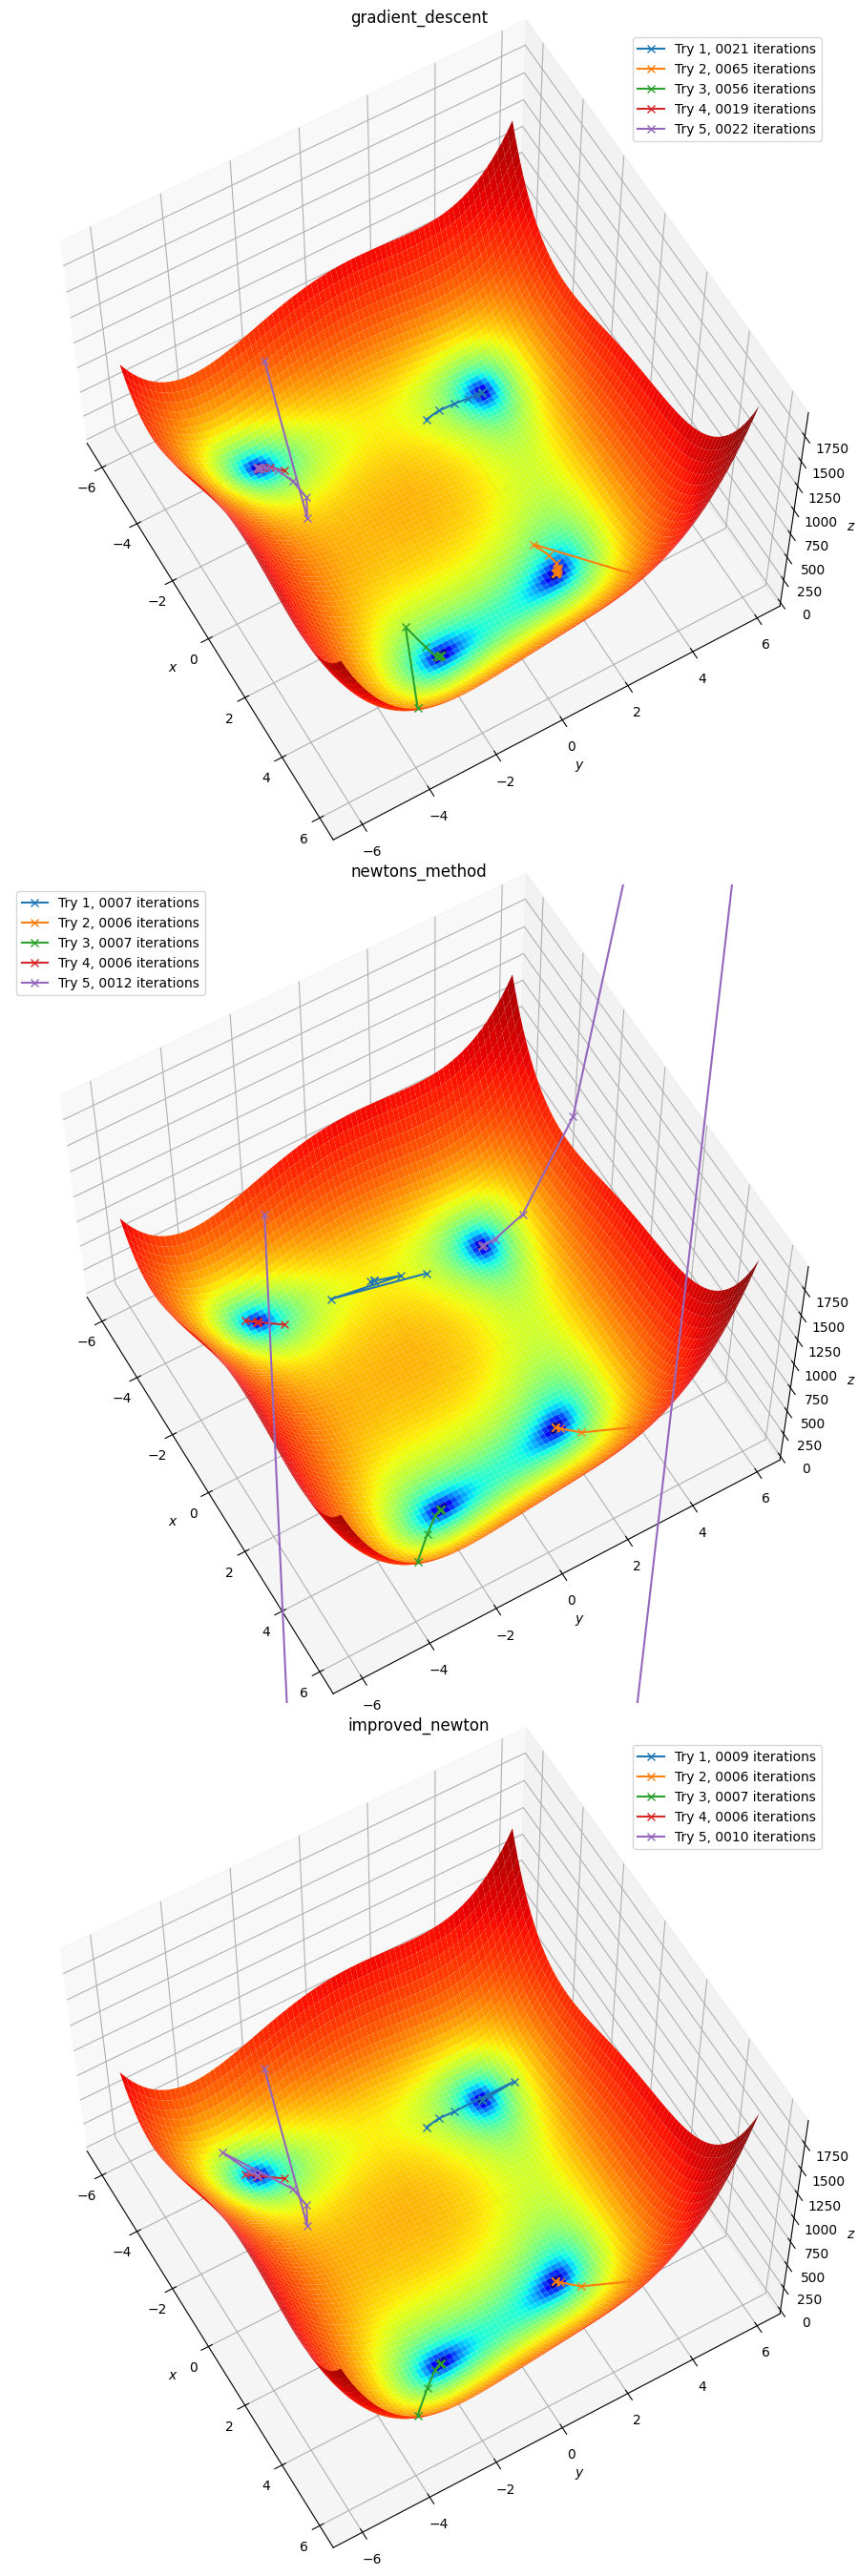

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D

def make_himmelblau_plot(ax, x, y):
    ax.view_init(elev=60, azim=-30) 
    # elevation and angle of view. azim is the azimuthal angle in the x,y plane
    
    ax.plot_surface(x, y, himmelblau([x,y]), cstride=1, rstride=1, norm=colors.LogNorm(), cmap=plt.cm.jet)
    # cstride and rstride are the row and column strides, respectively.

    ax.set_xlabel('$x$') # $ signs are used to render the text in LaTeX
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')

x = np.arange(-6, 6, 0.15) # 0.15 is the step size
y = np.arange(-6, 6, 0.15)
x, y = np.meshgrid(x, y)

# Please don't change the start point generation for your submission
retries = 5
rng = np.random.default_rng(654321)
# rng is a random number generator object with a seed of 654321
# The seed is used to make the random number generation reproducible
x_0 = rng.uniform(-6, 6, size=(retries, 2))

methods = [gradient_descent, newtons_method, improved_newton]

fig, axes = plt.subplots(len(methods), 1, figsize=(12, 27), subplot_kw=dict(projection='3d'))
# subplot_kw is a dictionary of keyword arguments to be passed to 
# the add_subplot call used to create each subplots.
# projection='3d' is used to create a 3D plot

for ax, method in zip(axes, methods):
    name = method.__name__
    ax.set_title(name)
    make_himmelblau_plot(ax, x, y)
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    z_min, z_max = ax.get_zlim()
    
    for t in range(retries):
        trace = method(himmelblau, himmelblau_gradient, himmelblau_hessian, x_0[t])
        ax.plot(trace[0], trace[1], himmelblau(trace), marker='x', 
                label=f'Try {t+1:d}, {trace.shape[1]:04d} iterations', zorder=3)
        print(f'{name} found a critical point for start value ({x_0[t,0]:.3f}, {x_0[t,1]:.3f}) '
              f'at ({trace[0,-1]:.3f}, {trace[1,-1]:.3f})!')
    
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_zlim(z_min, z_max)
    ax.legend()

fig.tight_layout()
plt.show()
plt.close(fig)

## 2. SVM Implementation
It is finally time to get your hands dirty and implement the SVM yourselves! Just for your convenience, here is the unconstrained optimization problem for the linear SVM that we want to train on the dataset $D = \{(\mathbf{x}^{(1)}, y^{(1)}), (\mathbf{x}^{(2)}, y^{(2)}), \ldots, (\mathbf{x}^{(n)}, y^{(n)})\}$:
\begin{equation*}
    \min_{\mathbf{w} \in \mathbb{R}^d, b \in \mathbb{R}} \frac{1}{2} \lVert \mathbf{w} \rVert^2 + \frac{C}{n} \sum_{i=1}^{n} \max\left(0, 1 - y^{(i)}(\mathbf{w}^T\mathbf{x}^{(i)} + b)\right)
\end{equation*}

1. Implement the support vector machine using (non-stochastic) gradient descent. Use the general gradient descent function that you have already written in exercise 1 of this sheet. The implementation should also include a flag that determines if a bias parameter $b$ should be learned during training or not. Choose $\mathbf{w}^{(0)} = \mathbf{0}$ and $b^{(0)} = 0$.
2. Now implement the SVM via stochastic gradient descent as well, i.e., sample a random batch of a given size from the training data for each gradient computation. Using your results from the previous part, this should only require you to change the wrapper function for computing the gradient.
3. Train both implementations on the simple two-dimensional toy dataset. Don't allow the SVM to learn a bias, i.e., $b$ should be zero.
4. Visualize the SVMs decision boundary and the optimization trajectory using the given code skeleton. This is also a good chance to see if your implementation works properly.
5. Produce a plot like in part 4 for both methods using the following parameter values: `C=1, step_size=0.1, batch_size=10, max_iter=1000`. Also print the value of $\mathbf{w}$ after training.
6. (OPTIONAL) Play around with parameters like step size, batch size, etc., and observe what changes.

<>:349: SyntaxWarning: invalid escape sequence '\m'
<>:350: SyntaxWarning: invalid escape sequence '\m'
<>:349: SyntaxWarning: invalid escape sequence '\m'
<>:350: SyntaxWarning: invalid escape sequence '\m'
C:\Users\FarisAbu-Ali\AppData\Local\Temp\ipykernel_7216\737575958.py:349: SyntaxWarning: invalid escape sequence '\m'
  ax.set_xlabel('$\mathbf{w}_1$')
C:\Users\FarisAbu-Ali\AppData\Local\Temp\ipykernel_7216\737575958.py:350: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('$\mathbf{w}_2$')


Final value of normal vector w for Gradient Descent: [0.41078    0.41301192]
Final value of normal vector w for Stochastic Gradient Descent: [0.43018995 0.39690409]


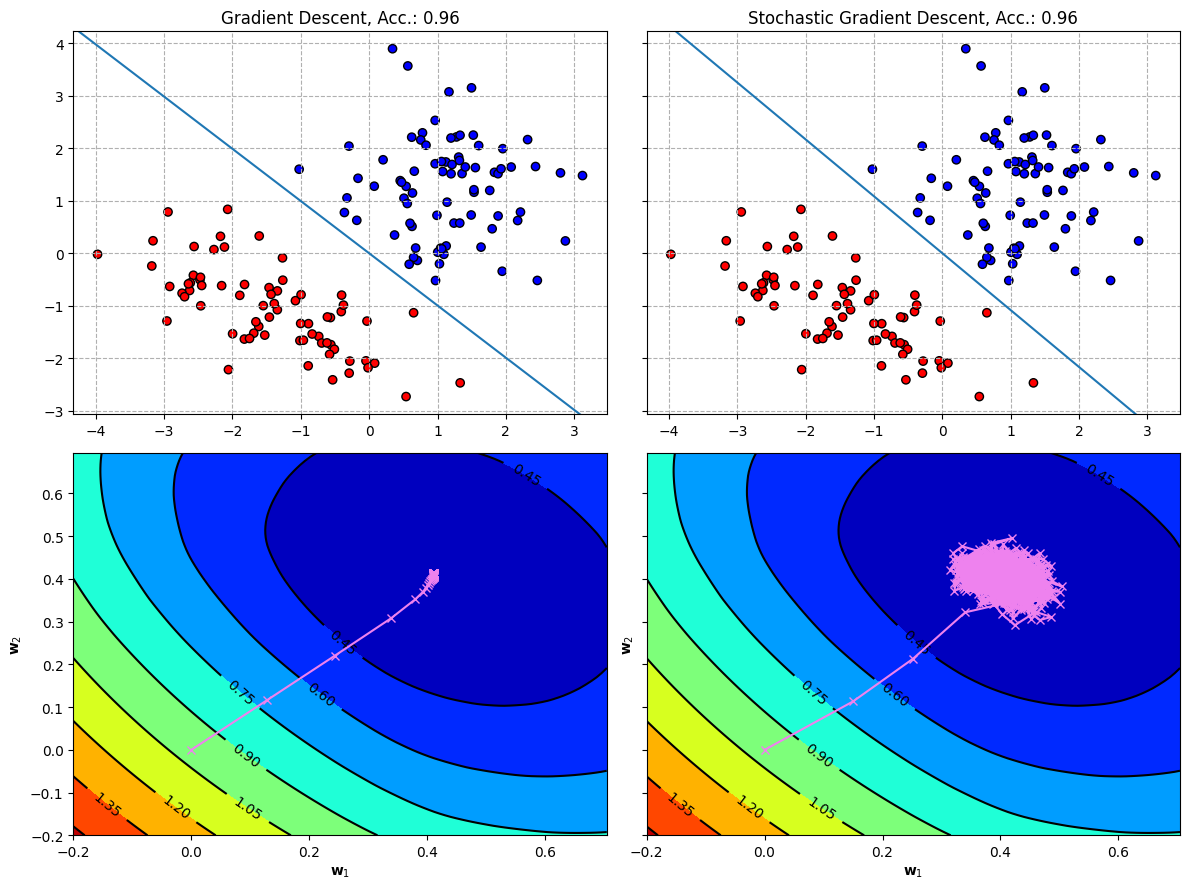

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification


def hinge_loss(t):
    return np.maximum(0, 1 - t)

def hinge_gradient(t):
    return np.where(t<1, -1, 0)
# derivative of 1 - t is -1
# derivative of 0 is 0
# when t >= 1, the max(0, 1-t) is 0, so the derivative is 0
# when t < 1, the max(0, 1-t) is 1-t, so the derivative is -1

def svm_loss(w, b, C, x, y):
    """
    Args:
        w: weight vector of shape (d,) or (d, m) for binary and multi-class classification, respectively.

        b: bias term of shape (m,) for multi-class classification, None for binary classification.

        C: regularization constant. The higher the value, the more the model will overfit the training data.
        
        X: training data of shape (n, d) where n is the number of data points and d is the dimensionality of each data point.

        y: class labels of shape (n,) for binary classification and (n, m) for multi-class classification.
    
    Returns:
        The SVM loss function value as a scalar for binary classification 
        or as a vector of shape (m,) for multi-class classification.
    """
    n, d = x.shape # each row is a data point of dimension d
    # n data points, d dimensions
    if w.ndim == 1:
        # This is the binary classification case, where the weight vector w is a 1D array of shape (d,), so m = 1
        # e.g. w = np.array([1, 2, 3]) here w.ndim = 1
        m = 1
    else:
        # This is the multi-class case, where the weight matrix w is of shape (d, m), so m is the number of classes.
        # So in summary, m represents the number of classifiers (or outputs). In binary classification, m = 1, and in multi-class classification, m > 1.
        # e.g. w = np.array([[1, 2, 3], [4, 5, 6]]) here w.ndim = 2
        m = w.shape[1]
        # m is the number of classifiers (or outputs) (m = 1 in binary classification)
        # if w.ndim = 1, m = 1 (binary classification)
        # if w.ndim = 2, m = number of columns in w (multi-class classification)
        if isinstance(b, np.ndarray):
            b = b.reshape(1, m) # reshape b to have 1 row and m columns
            
    w = w.reshape(d, m) # reshape w to have d rows and m columns
    y = y.reshape(n, 1) # Reshapes y into a column vector for easier broadcasting.
    # y was of shape (n,) and now it is of shape (n, 1)
    
    # y*(np.matmul(x, w) + b) has shape (n, m)
    # hinge_loss will be applied element-wise to y*(np.matmul(x, w) + b) 
    # and will return an array of shape (n, m)
    hinge_loss_penalty = hinge_loss(y*(np.matmul(x, w) + b)) # shape is (n, m)

    # sum each column of hinge_loss_penalty to get the total hinge loss for each classifier
    total_hinge_loss_penalty = np.sum(hinge_loss_penalty, axis=0) # shape is (m,)

    # In binary classification, m = 1, so total_hinge_loss_penalty is a scalar
    
    # In multi-class classification, m > 1, so total_hinge_loss_penalty is a vector of shape (m,)
    # where each element represents the total hinge loss for a particular class 🥹
    return 0.5*np.sum(w**2, axis=0) + C/x.shape[0] * total_hinge_loss_penalty

    # the returned value is a scalar in binary classification
    # or a vector of shape (m,) in multi-class classification 

def svm_gradient(w, b, C, x, y):
    """
    Args:
        w: weight vector of shape (d,) or (d, m) for binary and multi-class classification, respectively.

        b: bias term of shape (m,) for multi-class classification, None for binary classification.

        C: regularization constant. The higher the value, the more the model will overfit the training data.

        X: training data of shape (n, d) where n is the number of data points and d is the dimensionality of each data point.

        y: class labels of shape (n,) for binary classification and (n, m) for multi-class classification.
    
    Returns: `[w_bar, b_bar]`, the partial derivatives of the loss function with respect to `w` and `b`.
    """
    # Sorry for the mess, numpy's broadcasting rules are a bit verbose at times
    n, d = x.shape
    if w.ndim == 1:
        m = 1
    else:
        m = w.shape[1] # w.shape is (d, m)
        if isinstance(b, np.ndarray):
            b = b.reshape(1, m) 
    w = w.reshape(d, m)
    y = y.reshape(n, 1) # Reshapes y into a column vector for easier broadcasting.
    # y was of shape (n,) and now it is of shape (n, 1)
    
    # Since our optimization problem has two arguments, w and b, 
    # we need to compute the gradient with respect to both of them.
    # So take the partial derivative of the loss function with respect to w and b.

    # w_bar is the partial derivative of the loss function with respect to w
    w_bar = w + C/n * np.einsum('nm,nd->dm', hinge_gradient(y*(np.matmul(x, w) + b)), y*x)
    # Einstein summation is used to compute the dot product of:
    
    # hinge_gradient(y*(np.matmul(x, w) + b)) and y*x
    # y*(np.matmul(x, w) + b) has shape (n, m)
    # hinge_gradient(y*(np.matmul(x, w) + b)) has also shape (n, m) because it is applied element-wise.
    
    # y*x has shape (n, d)
        # y has shape (n, 1) and x has shape (n, d)
        # Via broadcasting, y*x will have shape (n, d)

    # The result is a matrix of shape (n, d) but HOW and WHY?
    # WHAT IS HAPPENING HERE? 🤔
    # Basically just ask yourself, what is the dimension of w? It is (d, m)
    # so should the gradient (w_bar) have the same dimension as w? Yes, it should.
    # How can we get a (d, m) matrix from the above operations if we have (n,m) and (n,d) matrices?
    # The answer is via the Einstein summation notation.
    

    # b_bar is the partial derivative of the loss function with respect to b
    # w_bar shape is (d, m)
    b_bar = C/n * np.sum(hinge_gradient(y*(np.matmul(x, w) + b))*y, axis=0, keepdims=True)
    # b_bar shape is (1, m)
    # hinge_gradient(y*(np.matmul(x, w) has shape (n, m)
    # y has shape (n, 1)
    # when multiplied, the result is a matrix of shape (n, m) due to broadcasting.
    # np.sum(..., axis=0) will sum each column of the matrix to get a vector of shape (m,)
    # but with keepdims=True, the shape will be (1, m) because the vector is kept as a row vector.

    # Now w_bar shape is (d, m) ✅
    # and b_bar shape is (1, m) ✅
    # where m is the number of classifiers (or outputs) (m = 1 in binary classification)
    return np.concatenate([w_bar, b_bar], axis=0).squeeze()

class SVM_GD(BaseEstimator, ClassifierMixin):
    def __init__(self, bias=True, C=1, step_size=0.01, max_iter=1000):
        super(SVM_GD, self).__init__()
        
        self.bias = bias
        self.C = C
        self.step_size = step_size
        self.max_iter = max_iter
        self.w = None
        self.b = None

        # w shape is (d,) or (d, m) for binary and multi-class classification, respectively.

    def fit(self, X, y):
        if self.bias:
            f = lambda w: svm_loss(w[:-1], w[-1], self.C, X, y)
            f_grad = lambda w: svm_gradient(w[:-1], w[-1], self.C, X, y)
        else:
            f = lambda w: svm_loss(w[:-1], 0, self.C, X, y)
            f_grad = lambda w: svm_gradient(w[:-1], 0, self.C, X, y)
        
        # 👆 This is a common trick in optimization algorithms where bias is 
        # handled by augmenting the weight vector with an additional term for the bias. 
        # It simplifies the gradient descent process by allowing both w and b to be optimized simultaneously without needing separate updates for the bias.
        
        # - The weight vector w[:-1] is still of dimension (d,) or (d, m) for binary 
        # and multi-class classification, respectively, which matches the number of 
        # features in X (d).
        # Thus, there's no dimensionality mismatch in the calculation of the loss.
        
        # - The bias term w[-1] is treated separately, as a scalar
        # which doesn't interfere with the dimensionality of the weight vector.

        w_0 = np.zeros(X.shape[1]+1) 
        # w_0 shape is (d+1,) the first d elements are the weights and the last element is the bias
        
        trace = gradient_descent(f, f_grad, None, w_0, step_size=self.step_size, max_iter=self.max_iter)
        # trace shape is (d+1, T) where T is the number of iterations
        # trace looks like this: 
        # [[w_11, w_12, ..., w_1T], [w_21, w_22, ..., w_2T], ..., [w_d+1, w_d+2, ..., w_d+1T]]
        
        self.w = trace[:-1, -1] # returns [w_1T, w_2T, ..., w_dT]
        self.b = trace[-1, -1] if self.bias else 0 # returns w_d+1T if bias is True, otherwise 0
        
        return trace

    def predict(self, X):
        if self.w is None or self.b is None:
            raise ValueError('Predict can only be called after supplying training data with fit first!')
        return np.sign(np.matmul(X, self.w) + self.b)
    
    # X shape is (n, d)

    # For binary classification:
    # w shape is (d,) 
    # b is a scalar but will be broadcasted to (n,)
    # X * w has shape (n, d) * (d,) = (n,)
    # then b is broadcasted to (n,) and added to the result.

    # For multi-class classification:
    # w shape is (d, m)
    # b is a vector of shape (m,)
    # X * w has shape (n, d) * (d, m) = (n, m)
    # then b is broadcasted to (n, m) and added to the result.
    
class SVM_SGD(SVM_GD):
    """
        SVM classifier using Stochastic Gradient Descent

        it inherits from SVM_GD and overrides the fit method to use stochastic gradient descent
    """
    def __init__(self, bias=True, batch_size=32, C=1, step_size=0.01, max_iter=1000):
        super(SVM_SGD, self).__init__(bias, C, step_size, max_iter)
        
        self.batch_size = batch_size
    
    def fit(self, X, y):
        if self.bias:
            f = lambda w: svm_loss(w[:-1], w[-1], self.C, X, y)
        else:
            f = lambda w: svm_loss(w[:-1], 0, self.C, X, y)
        
        def f_grad(w):
            from random import sample
            b = w[-1] if self.bias else 0
            w = w[:-1]
            # Sample a random batch from the training data
            batch_indices = sample(range(X.shape[0]), self.batch_size)
            # from a range of n data points, pick self.batch_size data points randomly
            # batch_indices is a list of self.batch_size random indices from 0 to n-1
            return svm_gradient(w, b, self.C, X[batch_indices], y[batch_indices])
 
        w_0 = np.zeros(X.shape[1]+1)
        
        trace = gradient_descent(f, f_grad, None, w_0, step_size=self.step_size, max_iter=self.max_iter)
        # trace shape is (d+1, T) where T is the number of iterations
        # trace looks like this: 
        # [[w_11, w_12, ..., w_1T], [w_21, w_22, ..., w_2T], ..., [w_d+1, w_d+2, ..., w_d+1T]]

        self.w = trace[:-1, -1] # returns [w_1T, w_2T, ..., w_dT]
        self.b = trace[-1, -1] if self.bias else 0 # returns w_d+1T if bias is True, otherwise 0
        return trace


def apply_line(x, w, b):
    """
        Helps know the decision boundary line (hyperplane) for the SVM classifier
        x: a 2D data point [x0, x1]
        w: a 2D weight vector [w0, w1]
        b: the bias term (scalar)

        w^T * x + b = 0 is the equation of the hyperplane
        w0*x0 + w1*x1 + b = 0
        
        Given the weight vector w = [w0, w1] and the bias term b, and the x0
        the function computes x1 using the equation of the hyperplane
    """
    a = -w[0]/w[1]
    b = -b/w[1]
    return a*x+b


# Generate toy data
# Please don't change the data generation seeds or methods for your submission
n = 200
X, Y = make_classification(n, n_features=2, n_redundant=0, 
                           n_clusters_per_class=1, class_sep=1.2, random_state=12345)
# class_sep = 1.2 means that the two classes are separated by a distance of 1.2
# The higher the value of class_sep, the more separated the two classes are

# Change labels from 0,1 to -1,1
Y *= 2; Y -= 1
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=12345)

svm_gd = SVM_GD(bias=False, step_size=0.1, C=1)
svm_sgd = SVM_SGD(bias=False, batch_size=10, C=1, step_size=0.1)

# In stochastic gradient descent (SGD), a larger step_size (or learning rate) 
# is often used compared to standard batch gradient descent (GD) for the following reasons:
    # - SGD computes the gradient using a random batch of data points (or a single point in the case of pure SGD), which introduces more variance into the gradient estimates.
    # - A smaller learning rate, like 0.01, might cause the algorithm to converge too slowly when using noisy gradients, because the algorithm might not move far enough in each step.

classifiers = [(svm_gd, 'Gradient Descent'), (svm_sgd, 'Stochastic Gradient Descent')]

traces = []
# In our case (make_classification) function, the data is (2D) and the weight vector is (2D) as well.
# e.g. [[w_11, w_12, ..., w_1T], [w_21, w_22, ..., w_2T], [b1, b2, ..., bT]]

cmap = colors.ListedColormap([[1.0, 0.0, 0.0], [0.0, 0.0, 1.0]])
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 9), sharex='row', sharey='row')

# axes[0] is for the dataset and decision boundary
# axes[1] is for the loss function contour plot

for (clf, name), ax in zip(classifiers, axes[0]):
    # Plot dataset
    ax.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=cmap, edgecolor='k')
    ax.grid(linestyle='dashed')
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    
    # Train classifier and plot decision boundary
    traces.append(clf.fit(X_train, Y_train)) 
    # the fit function returns the trace of the optimization process
    # In case of make_classification function, the data is (2D) and the weight vector is (2D) as well.
    # e.g. [[w_11, w_12, ..., w_1T], [w_21, w_22, ..., w_2T], [b1, b2, ..., bT]]
    
    if clf.w[1] == 0:
        # then the weight vector is horizontal and the decision boundary is a vertical line
        # w0 * x0 + w1 * x1 + b = 0
        # when w1 = 0, the equation becomes w0 * x0 + b = 0
        # x0 = -b/w0
        x_line = - clf.b / clf.w[0]
        ax.axvline(x_line) # axvline plots a vertical line at x = x_line
    else:
        x_line = np.array([x_min, x_max])
        ax.plot(x_line, apply_line(x_line, clf.w, clf.b))
    
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_title(f'{name}, Acc.: {clf.score(X_test, Y_test):.2f}')


# Plot trace
res = 100
w_min = np.minimum(np.min(traces[0], axis=1), np.min(traces[1], axis=1))
w_max = np.maximum(np.max(traces[0], axis=1), np.max(traces[1], axis=1))
# traces[0] is w1, e.g. [w_11, w_12, ..., w_1T]
# traces[1] is w2, e.g. [w_21, w_22, ..., w_2T]
# traces[2] is b, e.g. [b1, b2, ..., bT]

# w_min is 2D vector [w0_min, w1_min]
# w_max is 2D vector [w0_max, w1_max]

w_1 = np.linspace(w_min[0]-0.2, w_max[0]+0.2, res) # x coordinates for w1
w_2 = np.linspace(w_min[1]-0.2, w_max[1]+0.2, res) # y coordinates for w2
w_1, w_2 = np.meshgrid(w_1, w_2)

for (clf, name), trace, ax in zip(classifiers, traces, axes[1]):
    loss = svm_loss(np.stack([w_1.ravel(), w_2.ravel()], axis=0), 0, clf.C, X_train, Y_train.reshape(-1, 1))
    ax.contourf(w_1, w_2, loss.reshape(w_1.shape), levels=10, cmap=plt.cm.jet)
    cont = ax.contour(w_1, w_2, loss.reshape(w_1.shape), levels=10, colors='black')
    ax.clabel(cont, inline=1)
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    ax.plot(trace[0], trace[1], marker='x', c='violet', zorder=5)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xlabel('$\mathbf{w}_1$')
    ax.set_ylabel('$\mathbf{w}_2$')
    print(f'Final value of normal vector w for {name}:', clf.w)
    
fig.tight_layout()
plt.show()
plt.close(fig)   